In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

In [15]:
def CAMP_PDEP2(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, ACp):
    cAMP, PDEp = x
    dPDEp = r3*cAMP*((PDEt - PDEp)/K3) - r4*Et*PDEp/(K4 + PDEp)
    dcAMPdT = k1 * ACp - (k3 + k2 * PDEp) * cAMP
    return np.array([dPDEp, dcAMPdT])

k0, k1, k3, k2 = 0.0, 4.32, 0.58, 3.73
r1, r2, r3, r4 = 0.98, 4.48, 0.1, 0.14
K1, K2, K3, K4 = 2.48, 3.34, 9.24, 7.24
Dt, Et =  2.12, 1.6
ACt = 6.68
PDEt = 4.64

def plot_nullclines2(k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, ACp):
    cAMP_vals1 = np.linspace(-30, -0.019, 1000)
    cAMP_vals2 = np.linspace(0.019, 30, 1000)
    cAMP_vals = np.concatenate((cAMP_vals1, cAMP_vals2))
    PDEp_vals_1 = np.linspace(-30, -0.02, 500)
    PDEp_vals_2 = np.linspace(0.02, 30, 1000)
    PDEp_vals = np.concatenate((PDEp_vals_1, PDEp_vals_2))
    cAMP_grid, dACp_grid = np.meshgrid(cAMP_vals, PDEp_vals)

    t = 0
    x = np.array([cAMP_grid, dACp_grid])
    nullclines = CAMP_PDEP2(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, ACp)

    plt.figure(figsize=(8, 6))
    #plt.scatter(0.69, 1.0, color='black', marker='o', label='Fixed point (0,0,0)', zorder=3)
    plt.scatter(0, 0, color='black', marker='o', label='Fixed point (0,0,0)', zorder=3)
    plt.contour(cAMP_grid,dACp_grid, nullclines[0], levels=[0], colors='#1f77b4', linestyles='solid')
    plt.grid(linestyle=':', color='lightgray')
    plt.contour(cAMP_grid,dACp_grid ,nullclines[1], levels=[0], colors='orange', linestyles='solid')
    # Create custom legend handles and labels
    custom_lines = [Line2D([0], [0], color='#1f77b4', lw=2),
                    Line2D([0], [0], color='orange', lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]
    #plt.legend(custom_lines, ['cAMP', 'PDEp', 'Fixed point (0.70,0.69,1.00)'])
    plt.legend(custom_lines, ['cAMP', 'PDEp', 'Fixed point (0,0,0)'])
    plt.xlabel('cAMP')
    plt.ylabel('PDEp')
    plt.ylim(-0.5, 5)
    plt.xlim(-1,5)
    plt.title(f'PDEp and cAMP nullclines with fixed ACp at {ACp}')
    plt.savefig(f'Nullclines_for_PDEp_and_cAMP_with_ACp_fixed_at_{ACp}.png', dpi=300)
    plt.show()

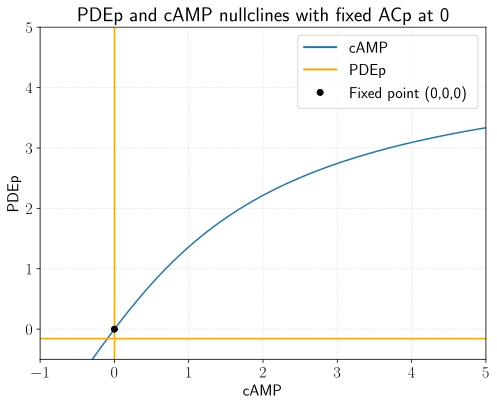

In [16]:
plot_nullclines2(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, 0)

In [17]:
def plot_nullclines3(k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, ACp):
    cAMP_vals1 = np.linspace(-30, -0.019, 1000)
    cAMP_vals2 = np.linspace(0.019, 30, 1000)
    cAMP_vals = np.concatenate((cAMP_vals1, cAMP_vals2))
    PDEp_vals_1 = np.linspace(-30, -0.02, 500)
    PDEp_vals_2 = np.linspace(0.02, 30, 1000)
    PDEp_vals = np.concatenate((PDEp_vals_1, PDEp_vals_2))
    cAMP_grid, dACp_grid = np.meshgrid(cAMP_vals, PDEp_vals)

    t = 0
    x = np.array([cAMP_grid, dACp_grid])
    nullclines = CAMP_PDEP2(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, ACp)

    plt.figure(figsize=(8, 6))
    #plt.scatter(0.69, 1.0, color='black', marker='o', label='Fixed point (0,0,0)', zorder=3)
    plt.scatter(0.69, 1, color='black', marker='o', label='Fixed point (0.70,0.69,1.00)', zorder=3)
    plt.contour(cAMP_grid,dACp_grid, nullclines[0], levels=[0], colors='#1f77b4', linestyles='solid')
    plt.grid(linestyle=':', color='lightgray')
    plt.contour(cAMP_grid,dACp_grid ,nullclines[1], levels=[0], colors='orange', linestyles='solid')
    # Create custom legend handles and labels
    custom_lines = [Line2D([0], [0], color='#1f77b4', lw=2),
                    Line2D([0], [0], color='orange', lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]
    #plt.legend(custom_lines, ['cAMP', 'PDEp', 'Fixed point (0.70,0.69,1.00)'])
    plt.legend(custom_lines, ['cAMP', 'PDEp', 'Fixed point (0.70,0.69,1.00)'])
    plt.xlabel('cAMP')
    plt.ylabel('PDEp')
    plt.ylim(-0.5, 5)
    plt.xlim(-1,5)
    plt.title(f'PDEp and cAMP nullclines with fixed ACp at {ACp}')
    plt.savefig(f'Nullclines_for_PDEp_and_cAMP_with_ACp_fixed_at_{ACp}.png', dpi=300)
    plt.show()

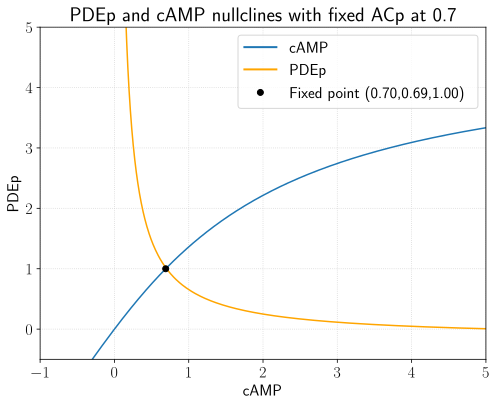

In [18]:
plot_nullclines3(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, 0.7)